In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
def cover_area(als, graf = False):
  global scene, DIM
  coverage = 0 
  min_x = als[0] - 20
  max_x = als[0] + 20  
  min_y = als[1] - 20
  max_y = als[1] + 20
  if min_x < 0:
    min_x = 0  
  if max_x > DIM:
    max_x = DIM  
  if min_y < 0:
    min_y = 0  
  if max_y > DIM:
    max_y = DIM

  for i in range(min_x,max_x):
    for j in range(min_y,max_y):
      rad = math.sqrt((i - als[0])**2 + (j - als[1])**2)
      if rad < 20:
        if graf:
          scene_graf[i][j] += 1
        if scene[i][j] == 0:
          scene[i][j] = 1
          coverage += 1
  return coverage

In [ ]:
def potencial_cover_area(als):
  global scene, DIM
  coverage = 0 
  min_x = als[0] - 20
  max_x = als[0] + 20  
  min_y = als[1] - 20
  max_y = als[1] + 20
  if min_x < 0:
    min_x = 0  
  if max_x > DIM:
    max_x = DIM  
  if min_y < 0:
    min_y = 0  
  if max_y > DIM:
    max_y = DIM

  for i in range(min_x,max_x):
    for j in range(min_y,max_y):
      rad = math.sqrt((i - als[0])**2 + (j - als[1])**2)
      if rad < 20:
        if scene[i][j] == 0:
          coverage += 1
  return coverage

In [ ]:
def actualizar_heur():
  global scene, DIM, N_ALS,list_als
  for k in range(N_ALS):
    heur_array[k] = potencial_cover_area(list_als[k])

In [ ]:
DIM = 100
N_ALS = 50
N_ANTENAS = 15
N_HORMIGAS = 20
FAC_Q = 0.9
FAC_EVAP_L = 0.5
FAC_EVAP_G = 0.3

ferom_matrix = np.zeros((N_ALS,N_ALS)) #Matriz de Feromonas i-j


list_als = [] #Nuevos ALS (Available Location Site) Aleatorios
for i in range(N_ALS):
  list_als.append((random.randint(0,DIM-1),random.randint(0,DIM-1)))


In [ ]:
cover_list = []

max_cover_area = 0
max_list_index = []
min_cover_area = 9999999
min_list_index = []

best_lists = []

In [ ]:
for h in range(N_HORMIGAS):
  print ("hormiga",h)
  list_index = []
  cover_area_horm=0
  scene = np.zeros((DIM,DIM)) #Nuevo Escenario
  scene_graf = np.zeros((DIM,DIM)) # Escenario Gráfico
  heur_array = np.zeros(N_ALS) #Arreglo de Heurística

  counter = 0
  index_1 = 0  
  index_2 = 0
  while counter < N_ANTENAS:
    if counter == 0:  # Si es el primer paso, se inicia en un ALS aleatorio
      index_1 = random.randint(0, len(list_als)-1)
      list_index.append(index_1) # Guardar en la memoria de la Hormiga
      cover_area_horm += cover_area(list_als[index_1]) # Calcular area de cobertura
      counter += 1
    else:       # Si no es el primer paso, se evalua cual será el siguiente paso
      #Criterio de Selección
      if random.random() < FAC_Q:
        # Max
        actualizar_heur()
        max_f = 0
        '''list_ferom = []
        for i in range(N_ALS):
          list_ferom.append((i, ferom_matrix[0][i]))
        list_ferom = sorted(list_ferom, key=lambda x: x[:][1], reverse = True)
        select = random.random()
        for i in range(N_ALS):
          if 1/(i+1) > select:
            index_2 = list_ferom[i][0]'''
        
        for i in range(N_ALS):  #Buscar Máximo
          if ferom_matrix[index_1][i]*heur_array[i] > max_f:
            max_f = ferom_matrix[index_1][i]*heur_array[i]
            index_2 = i
      else:
        # Funcion Aleatoria
        
        list_ferom = []
        for i in range(N_ALS):
          list_ferom.append((i, ferom_matrix[0][i]))
        list_ferom = sorted(list_ferom, key=lambda x: x[:][1], reverse = True)
        select = random.random()
        for i in range(N_ALS):
          if 1/(i+1) > select:
            index_2 = list_ferom[i][0]
      
      if index_2 in list_index:
        index_2 = random.randint(0, N_ALS-1)
      
      if index_2 not in list_index:
        list_index.append(index_2) # Guardar en la memoria de la Hormiga
        cover_area_horm += cover_area(list_als[index_2]) # Calcular area de cobertura
        #actualizar_heur()
        counter += 1

        ferom_matrix[index_1][index_2] = ferom_matrix[index_1][index_2]*(1-FAC_EVAP_L) + 1#Evaporar Feromonas en ruta
        index_1 = index_2
  
  cover_list.append(cover_area_horm)

  if cover_area_horm > max_cover_area:
    max_cover_area = cover_area_horm
    max_list_index = list_index.copy()
    best_lists.append(list_index)

  if cover_area_horm < min_cover_area:
    min_cover_area = cover_area_horm
    min_list_index = list_index.copy()


for i in range(len(list_index)-1):
  ferom_matrix[max_list_index[i]][max_list_index[i+1]] = ferom_matrix[max_list_index[i]][max_list_index[i+1]]*(1-FAC_EVAP_G) + 2
  cover_area(list_als[max_list_index[i]], True) # Graficar mejor area de cobertura

hormiga 0
hormiga 1
hormiga 2
hormiga 3
hormiga 4
hormiga 5
hormiga 6
hormiga 7
hormiga 8
hormiga 9
hormiga 10
hormiga 11
hormiga 12
hormiga 13
hormiga 14
hormiga 15
hormiga 16
hormiga 17
hormiga 18
hormiga 19


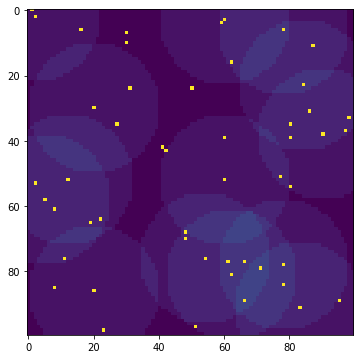

In [ ]:
scene_graf = np.zeros((DIM,DIM)) # Escenario Gráfico
for i in range(len(list_index)-1):
  cover_area(list_als[max_list_index[i]], True) # Graficar mejor area de cobertura
for i in range(N_ALS): #Marcar ALS
  scene_graf[list_als[i][0]][list_als[i][1]] = 20
  
plt.figure(figsize = (6,6))
fig = plt.imshow(scene_graf, interpolation='nearest')
plt.show()

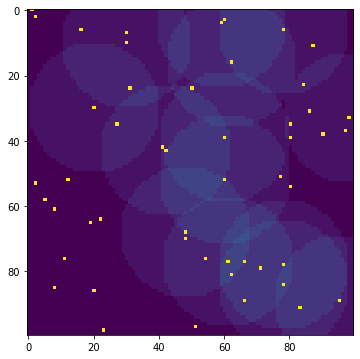

In [ ]:
scene_graf = np.zeros((DIM,DIM)) # Escenario Gráfico
for i in range(len(list_index)-1):
  cover_area(list_als[min_list_index[i]], True) # Graficar menor area de cobertura
for i in range(N_ALS): #Marcar ALS
  scene_graf[list_als[i][0]][list_als[i][1]] = 20
  
scene_graf[list_als[i][0]][list_als[i][1]] = 20
plt.figure(figsize = (6,6))
fig = plt.imshow(scene_graf, interpolation='nearest')
plt.show()

In [ ]:
max_cover_area

9293

In [ ]:
min_cover_area

7215

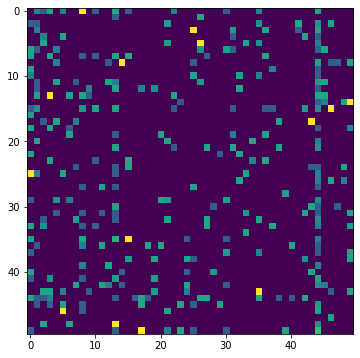

In [ ]:
plt.figure(figsize = (6,6))
fig = plt.imshow(ferom_matrix, interpolation='nearest')
plt.show()

In [ ]:
plt.figure(figsize = (6,6))
fig = plt.imshow(heur_array.reshape(1,len(heur_array)), interpolation='nearest')
plt.show()

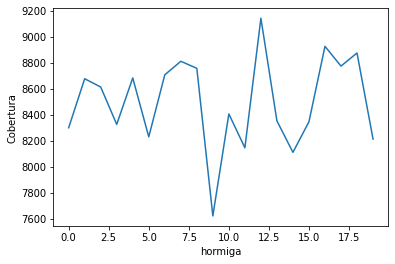

In [ ]:
x = np.arange(len(cover_list))
y1 = np.array(cover_list)

plt.xlabel('hormiga')
plt.ylabel('Cobertura')
plt.plot(x,y1)

plt.show()


In [ ]:
best_lists

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [ ]:
def view_best(w):
  global scene_graf, list_als
  scene_graf = np.zeros((DIM,DIM)) # Escenario Gráfico

  for i in range(N_ALS): # Marcar ALS
    scene_graf[list_als[i][0]][list_als[i][1]] = 20

  for i in range(len(best_lists[0])-2):
    cover_area(list_als[best_lists[w][i]], True) # Graficar area de cobertura
    scene_graf[list_als[best_lists[w][i]][0]][list_als[best_lists[w][i]][1]] = 10

  plot = ax.imshow(scene_graf, interpolation='nearest')

  return plot

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

anim = animation.FuncAnimation(fig, view_best, frames=len(best_lists), blit=False, repeat=True)


In [ ]:
best_lists

In [ ]:
anim